In [ ]:
!pip install pmdarima

## Monthly Champagne Sales Millions
* Dữ liệu từ tháng 01/1964 - 09/1972
* Yêu cầu: Đọc và chuẩn hóa dữ liệu. Sau đó chọn thuật toán Times Series thích hợp để dự đoán số tiền Champagne bán được của 9 tháng tiếp theo từ tháng 10/1972 - 06/1973 giá trị dựa trên các thông tin được cung cấp
  1. Thực hiện Decomposition, trực quan hóa và nhận xét
  2. Tạo dữ liệu train/test với test_size = 0.25
  3. Áp dụng thuật toán phù hợp.
  4. Tìm kết quả.
  5. Trực quan hóa kết quả (biểu đồ phải có train, test, predict và predict next 9 months).

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/CSS/LDS6_K268_ONLINE_HuynhVinhThang/LDS6_HuynhVinhThang_Cuoi_ky'

/content/gdrive/My Drive/CSS/LDS6_K268_ONLINE_HuynhVinhThang/LDS6_HuynhVinhThang_Cuoi_ky


#Load Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Load Dataset

In [ ]:
champ = pd.read_excel('champagne_new.xlsx', index_col = 0)
champ.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [ ]:
champ.tail()

,monthly_champange
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [ ]:
champ.index = pd.to_datetime(champ.index)

In [ ]:
champ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


[]

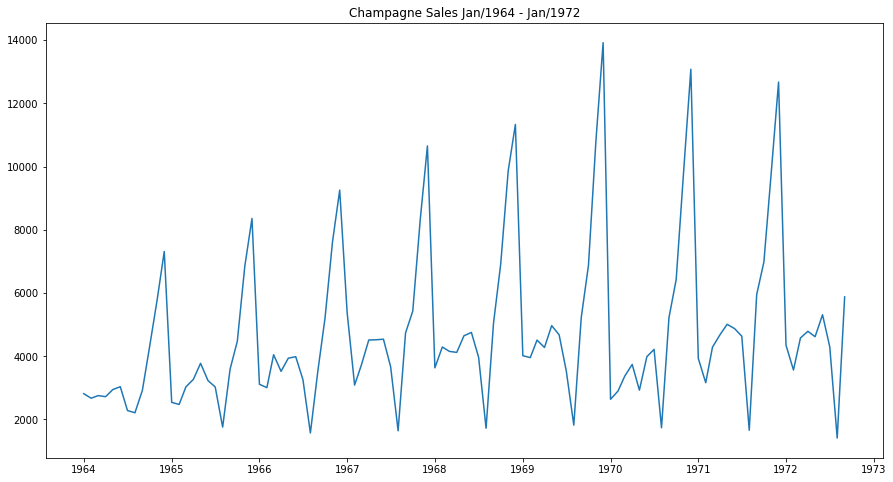

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(champ)
plt.title('Champagne Sales Jan/1964 - Jan/1972')
plt.plot()

- The Sales data showed there are seasonal trends every year.
- The trend will riseup from autumn to the end of the year (winter). The family gather toghether to share chamagne for celebrating Chismast and New year eve.
- Then the trend will go down in the middle of spring to summer.

## Seasonal Decompose

In [ ]:
result = seasonal_decompose(champ, model = 'multiplicative')
result

[]

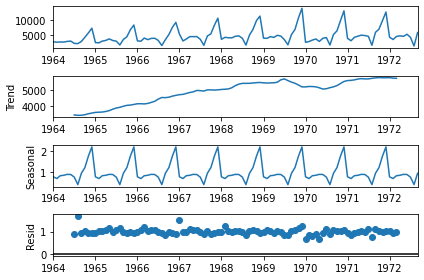

In [ ]:
result.plot()
plt.plot()

- Trend: the trend goes strongly from 1964 to jul, 1969. Then it goes down till May, 1970 then goes up but not strong like before

## Auto ARIMA

In [ ]:
stepwise_model = auto_arima(champ, start_p=2, start_q=2,
                           max_p=5, max_q=5, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print('AIC of the best model: ',stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.44 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1491.853, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1491.669, Time=0.64 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1491.700, Time=1.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.38 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1491.649, Time=1.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.69 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.24 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=1.62 sec
 ARIMA(1,1,1)(1,1,1)[12]     

The best model is (111)(110) with AIC value is 1485.1905

In [ ]:
#Select X_train/test

train = champ.loc['1964-01-01': '1970-07-01']
test = champ.loc['1970-08-01':]

print('Train size:', len(train), '\t\t\t Test size:', len(test))
print('Test size percentage:', round(len(test)/champ.shape[0], 2))

Train size: 79 			 Test size: 26
Test size percentage: 0.25


In [ ]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=len(test))   #n_periods: khoang thoi gian can du bao

In [ ]:
future_forecast

array([ 1940.04759507,  5225.1791476 ,  6870.88266014, 10715.67165887,
       13693.32152715,  2740.77227496,  2974.5918124 ,  3452.30245439,
        3772.80829253,  3083.12922498,  4031.5087179 ,  4149.02033333,
        1919.18013509,  5213.80607045,  6859.86164159, 10711.71486117,
       13700.45546281,  2721.3203722 ,  2957.28516451,  3434.44592938,
        3759.00737163,  3059.22325608,  4016.66711068,  4143.47808472,
        1909.77746229,  5203.62541785])

In [ ]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns = ['Prediction'])

[]

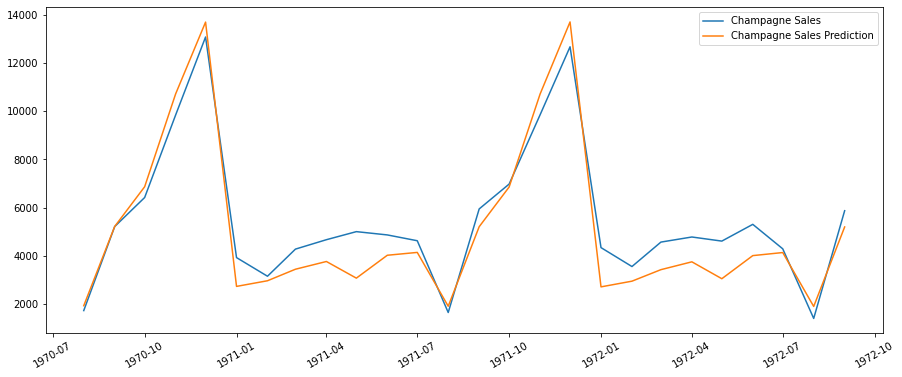

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(test, label = 'Champagne Sales')
plt.plot(future_forecast, label = 'Champagne Sales Prediction')
plt.xticks(rotation = 30)
plt.legend(loc = 'best')
plt.plot()

- The prediction fit with the train when it's goes up, but it quite far away when there is goes down.
- But it will be good for business man when they look at the plot and prediction go down, then they will better have preparation for their business.

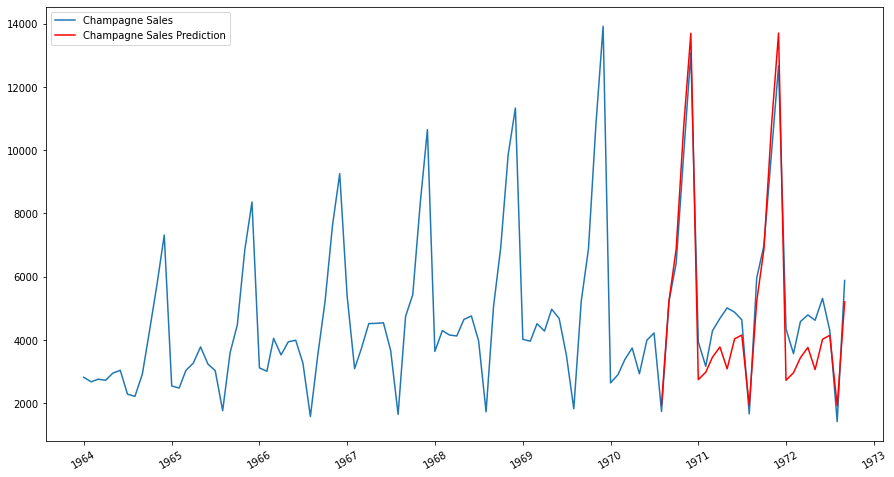

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(champ, label = 'Champagne Sales')
plt.plot(future_forecast, label = 'Champagne Sales Prediction', color = 'red')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

In [ ]:
R_test = r2_score(test, future_forecast[0:len(test)])
mae = mean_absolute_error(test, future_forecast[0:len(test)])
print('R^2 Test:', R_test*100, '%')
print('MAE Test:', mae)

R^2 Test: 89.9681213768517 %
MAE Test: 773.399114637743


The R square is not bad, but the MAE value quite big.

In [ ]:
test.mean()

monthly_champange    5491.653846
dtype: float64

##Champagne Sales 9 months Prediction

In [ ]:
future_forecast_9 = stepwise_model.predict(n_periods=len(test) + 9)   #n_periods: khoang thoi gian can du bao

In [ ]:
future_forecast_9

array([ 1940.04759507,  5225.1791476 ,  6870.88266014, 10715.67165887,
       13693.32152715,  2740.77227496,  2974.5918124 ,  3452.30245439,
        3772.80829253,  3083.12922498,  4031.5087179 ,  4149.02033333,
        1919.18013509,  5213.80607045,  6859.86164159, 10711.71486117,
       13700.45546281,  2721.3203722 ,  2957.28516451,  3434.44592938,
        3759.00737163,  3059.22325608,  4016.66711068,  4143.47808472,
        1909.77746229,  5203.62541785,  6849.65214094, 10700.92651077,
       13688.75832595,  2711.80170714,  2947.590715  ,  3424.79653738,
        3749.02565913,  3050.06956193,  4006.77067312])

[]

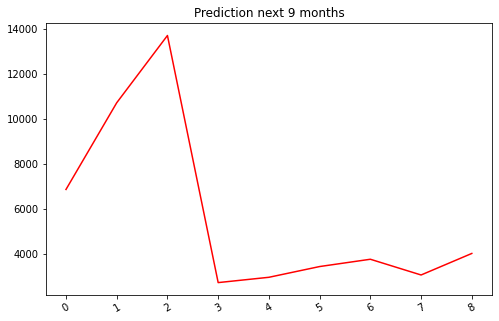

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(future_forecast_9[len(test):], color = 'red')
plt.xticks(rotation = 30)
plt.title('Prediction next 9 months')
plt.plot()

In [ ]:
months = pd.date_range('1972-10-01', '1973-06-01', freq = 'MS').strftime("%Y-%m-%d").tolist()


In [ ]:
future_forecast_9 = pd.DataFrame({'DATE': months,
                                   'Sales Next 9 Months':future_forecast_9[len(test):]})

In [ ]:
future_forecast_9.set_index('DATE', inplace = True)

In [ ]:
future_forecast_9.index = pd.to_datetime(future_forecast_9.index)

In [ ]:
future_forecast_9

,Sales Next 9 Months
DATE,
1972-10-01,6849.652141
1972-11-01,10700.926511
1972-12-01,13688.758326
1973-01-01,2711.801707
1973-02-01,2947.590715
1973-03-01,3424.796537
1973-04-01,3749.025659
1973-05-01,3050.069562
1973-06-01,4006.770673


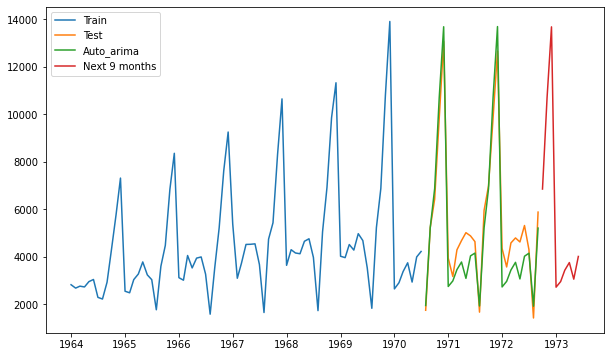

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(future_forecast.index, future_forecast, label = 'Auto_arima')
plt.plot(future_forecast_9.index, future_forecast_9['Sales Next 9 Months'], label = 'Next 9 months')
plt.legend(loc = 'best')

- With the prediction in the next 9 months, the sales will rise up like last year, from the end of autumn to the begining of spring. Then it's will go down